In [1]:
import tensorflow as tf
print(tf.keras.__version__)


2.8.0


In [2]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PNEUMONIA


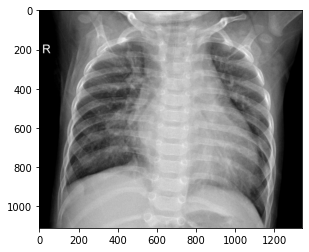

NORMAL


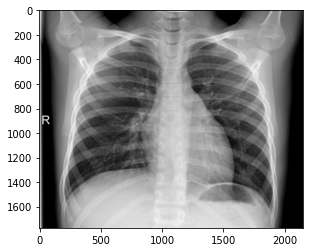

In [3]:
import os
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float
# import pydicom as dicom
# import pydicom
from skimage.transform import resize
import cv2
main='./drive/MyDrive/university/chest_xray 4/'
arr=[]
classes = ['PNEUMONIA', 'NORMAL']
img_size = 150
# list_of_images = [] 
dir=['train','test']
for d in (dir):
  train=main+d
  
  for c in classes: 
      path = os.path.join(train, c)
      class_num = classes.index(c)
      print(c)
      for img in os.listdir(path):
          img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
          resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
          arr.append(resized_arr)
          # arr.append([resized_arr, class_num])
          plt.imshow(img_arr,cmap='gray')
          plt.show()

          break
  break

   

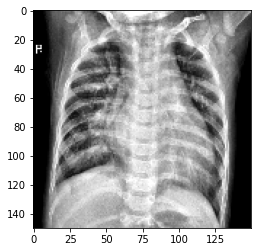

In [4]:
exp=exposure.equalize_adapthist(arr[0]/np.max(arr[0]))
plt.imshow(exp,cmap='gray')

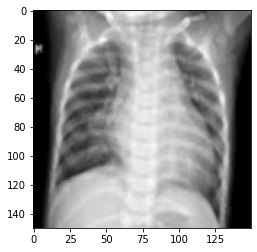

In [5]:
src = cv2.GaussianBlur(arr[0], (3, 3), 0)
# src=exposure.equalize_adapthist(src/np.max(src))
# # src=cv2.convertScaleAbs(src)
# src=cv2.filter2D(src,-1, kernel)
plt.imshow(src,cmap='gray')

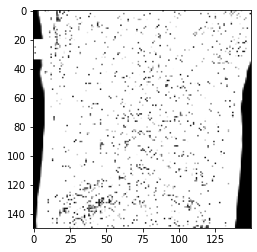

In [6]:
dst = cv2.Laplacian(src, cv2.CV_32F, ksize=7)
abs_dst = cv2.convertScaleAbs(dst)
plt.imshow(abs_dst,cmap='gray')

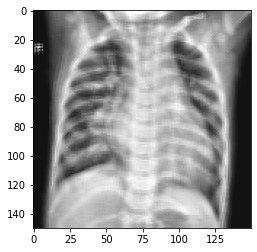

In [7]:
kernel = np.array([[20,-10,20], [-5,9,-7], [40,10,50]])
im = cv2.filter2D(exp,-1, kernel)
plt.imshow(im,cmap='gray')

100.0


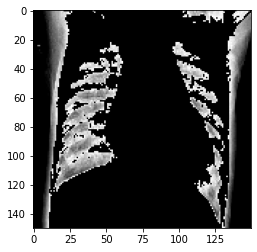

In [8]:
ret, thresh = cv2.threshold(arr[0],100,255,100)
plt.imshow(thresh,cmap='gray')
print(ret)

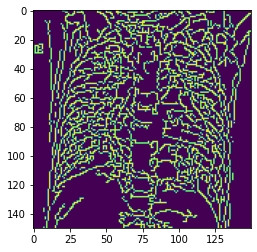

In [9]:
canny = cv2.Canny(arr[0], 50, 120)
plt.imshow(canny)

In [10]:
from tqdm import tqdm_notebook
main='./drive/MyDrive/university/chest_xray 4/'
X=[]
y=[]
classes = ['PNEUMONIA', 'NORMAL']
img_size = 250
# list_of_images = [] 
dir=['train']
for d in dir:
  train=main+d
  for c in classes: 
      path = os.path.join(train, c)
      class_num = classes.index(c)
      for img in tqdm_notebook(os.listdir(path)):

        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            # exp=exposure.equalize_adapthist(resized_arr/np.max(resized_arr))
            exp = cv2.Canny(resized_arr, 50, 120)

            # resized_arr = cv2.filter2D(exp,-1, kernel)
            X.append(exp)
            y.append(class_num)
        except Exception as e:
                  print(e)

        # arr.append([resized_arr, class_num])
        # plt.imshow(resized_arr)
        # plt.show()
        # break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/3884 [00:00<?, ?it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



  0%|          | 0/1349 [00:00<?, ?it/s]

In [11]:
# from tqdm import tqdm_notebook
# main='./drive/MyDrive/university/chest_xray 4/'
# X=[]
# y=[]
# classes = ['PNEUMONIA', 'NORMAL']
# img_size = 250
# # list_of_images = [] 
# dir=['train']
# for d in dir:
#   train=main+d
#   for c in classes:
#     if c=='PNEUMONIA':

#       path = os.path.join(train, c)
#       class_num = classes.index(c)
#       image=os.listdir(path)
#       for img in tqdm_notebook(image[:1349]):

#         try:
#             img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#             resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
#             # exp=exposure.equalize_adapthist(resized_arr/np.max(resized_arr))
#             exp = cv2.Canny(resized_arr, 50, 120)

#             # resized_arr = cv2.filter2D(exp,-1, kernel)
#             X.append(exp)
#             y.append(class_num)
#         except Exception as e:
#                   print(e)

#     else: 
#       path = os.path.join(train, c)
#       class_num = classes.index(c)
#       image=os.listdir(path)
#       for img in tqdm_notebook(image):

#         try:
#             img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#             resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
#             # exp=exposure.equalize_adapthist(resized_arr/np.max(resized_arr))
#             exp = cv2.Canny(resized_arr, 50, 120)

#             # resized_arr = cv2.filter2D(exp,-1, kernel)
#             X.append(exp)
#             y.append(class_num)
#         except Exception as e:
#                   print(e)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
                                  rescale=1./255.,
                                  # rotation_range = 20,
                                  # brightness_range=[0.4,0.8],
                                  # width_shift_range = 0.2,
                                  # height_shift_range = 0.2,
                                  # shear_range = 0.2,
                                  # zoom_range = [0.7,1],
                                  

                                  # horizontal_flip = True,
                                 
                                 featurewise_center = False,
                                  samplewise_center = False,
                                  featurewise_std_normalization = False,
                                  samplewise_std_normalization = False,
                                  zca_whitening = False,
                                  rotation_range = 30
                                 )

In [13]:
X=np.array(X)

In [14]:
y=np.array(y)

In [15]:
X1=X.reshape(-1,img_size,img_size,1)

In [16]:
X1.shape

(5232, 250, 250, 1)

In [17]:
y1=y

In [18]:
import gc
# del(X)
# del(Y)
print(X1.shape, y1.shape)
gc.collect()

(5232, 250, 250, 1) (5232,)


7943

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten,MaxPooling2D,Activation, Conv2D,BatchNormalization, Dense, GlobalAveragePooling2D, Lambda, Dropout, InputLayer, Input
from tensorflow.keras.utils import to_categorical

In [20]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, \
val_labels,= train_test_split( X1, 
                y1, test_size = 0.2, 
                random_state = 1,
                shuffle=True)

print('Total Training Images: {}, Total Test Images: {}'.format(
    len(train_images), 
    len(val_images)
    ))

Total Training Images: 4185, Total Test Images: 1047


In [21]:
train_images[0].shape

(250, 250, 1)

In [22]:
model = tf.keras.applications.ResNet50( input_shape=train_images.shape[1:], 
    include_top=False, 
    weights=None
    )

In [23]:
base_model_output=model.output

flattened_output = Flatten()(base_model_output)

class_prediction = Dense(128, activation="relu")(flattened_output)
# class_prediction = Dense(256, activation="relu")(class_prediction )
class_prediction = Dropout(0.2)(class_prediction)
# class_prediction = Dense(126, activation="relu")(class_prediction)
# class_prediction = Dropout(0.7)(class_prediction )
# class_prediction = Dense(42, activation="relu")(class_prediction)
class_prediction = Dense(14, activation='softmax',
                             name="class_output")(class_prediction)


In [24]:
import tensorflow
loss_fn = tensorflow.keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_fn,
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
op = Model(inputs=model.input, outputs= class_prediction)


In [26]:
op.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  3200        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
losses = { 
    "class_output": "sparse_categorical_crossentropy"
    }

loss_weights = {
    "class_output": 0.3
    }

metrics = {
    'class_output': 'accuracy', 
    }

stop = EarlyStopping(monitor = "val_loss", min_delta = 0.1, patience = 5, 
                    restore_best_weights = True
                     )



opt = tf.keras.optimizers.Adam(learning_rate=0.0001)


op.compile(optimizer = opt, loss = losses, loss_weights = loss_weights, 
    metrics = metrics)

In [28]:
val_datagen=ImageDataGenerator(rescale=1./255.0,
                                samplewise_center=True, #Set each sample mean to 0.
                                  samplewise_std_normalization= True, # Divide each input by its standard deviation
                                 )

In [29]:
history=op.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=32),
  validation_data=val_datagen.flow(val_images, val_labels), steps_per_epoch=len(train_images)//32,
  epochs=4,callbacks=[stop])

Epoch 1/4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


130/130 [==============================] - 39s 247ms/step - loss: 0.3649 - accuracy: 0.8091 - val_loss: 0.6048 - val_accuracy: 0.7612
Epoch 2/4
130/130 [==============================] - 30s 232ms/step - loss: 0.0909 - accuracy: 0.8700 - val_loss: 0.6229 - val_accuracy: 0.7612
Epoch 3/4
130/130 [==============================] - 30s 233ms/step - loss: 0.0856 - accuracy: 0.8767 - val_loss: 0.1500 - val_accuracy: 0.7832
Epoch 4/4
130/130 [==============================] - 30s 232ms/step - loss: 0.0809 - accuracy: 0.8876 - val_loss: 1.4927 - val_accuracy: 0.7564


In [45]:
from tensorflow.keras.applications import densenet
from tensorflow.keras import regularizers
chex=densenet.DenseNet121(include_top=False,weights=None,input_shape=train_images.shape[1:])

base_model1_output=chex.output

flattened_output = Flatten()(base_model1_output)

class_prediction = Dense(128, activation="relu",kernel_initializer='glorot_uniform')(flattened_output)

# class_prediction = Dropout(0.2)(class_prediction )
# class_prediction = Dense(128, activation="relu")(class_prediction)

# class_prediction = Dropout(0.3)(class_prediction )
# class_prediction = Dense(128, activation="relu")(class_prediction)

# class_prediction = Dropout(0.4)(class_prediction )
# class_prediction = Dense(256, activation="relu")(class_prediction)


# class_prediction = Dense(256, activation="relu")(class_prediction)
# ## starts here
# class_prediction = Dropout(0.3)(class_prediction )
# class_prediction = Dense(64, activation="relu")(class_prediction)

# class_prediction = Dropout(0.4)(class_prediction )
# class_prediction = Dense(32, activation="relu")(class_prediction)


# #ends here

# class_prediction = Dropout(0.8)(class_prediction )
class_prediction = Dropout(0.2)(class_prediction )

class_prediction = Dense(2, activation='softmax',
                             name="class_output")(class_prediction)


In [46]:
op1 = Model(inputs=chex.input, outputs= class_prediction)

In [47]:

from tensorflow.keras.callbacks import EarlyStopping


metrics = {
    'class_output': 'accuracy', 
 
    }

stop = EarlyStopping(monitor = "val_loss", min_delta = 0.01, patience = 5, 
                    restore_best_weights = True
                     )


opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
losses=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction="auto", name="sparse_categorical_crossentropy"
)


#higher loss weight is lower accuracy
op1.compile(optimizer = opt, loss = losses, loss_weights = 0.2, 
    metrics = metrics)

In [48]:
op1.fit(train_datagen.flow(train_images, train_labels, batch_size=30),
  validation_data=val_datagen.flow(val_images, val_labels), steps_per_epoch=len(train_images)//30,
  epochs=20,
  callbacks=[stop]
  )

Epoch 1/20
139/139 [==============================] - 42s 233ms/step - loss: 0.0634 - accuracy: 0.8732 - val_loss: 0.3035 - val_accuracy: 0.7612
Epoch 2/20
139/139 [==============================] - 31s 220ms/step - loss: 0.0390 - accuracy: 0.9256 - val_loss: 0.2247 - val_accuracy: 0.7612
Epoch 3/20
139/139 [==============================] - 31s 219ms/step - loss: 0.0319 - accuracy: 0.9365 - val_loss: 0.2406 - val_accuracy: 0.7555
Epoch 4/20
139/139 [==============================] - 31s 219ms/step - loss: 0.0265 - accuracy: 0.9471 - val_loss: 2.4003 - val_accuracy: 0.7612
Epoch 5/20
139/139 [==============================] - 31s 219ms/step - loss: 0.0267 - accuracy: 0.9509 - val_loss: 2.8230 - val_accuracy: 0.7603
Epoch 6/20
139/139 [==============================] - 31s 220ms/step - loss: 0.0240 - accuracy: 0.9555 - val_loss: 1.5255 - val_accuracy: 0.7488
Epoch 7/20
139/139 [==============================] - 31s 221ms/step - loss: 0.0212 - accuracy: 0.9586 - val_loss: 0.6339 - val_ac

In [49]:
# op1.summary()

In [50]:
from tensorflow.keras.layers import MaxPool2D,AveragePooling2D

model = Sequential()
model.add(Conv2D(64, (3, 3), strides = 1, padding = 'same', activation = 'relu', input_shape=train_images.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3, 3), strides=1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))

model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3, 3), strides=1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))

# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides=1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))

# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides=1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))

# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides=1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))

# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides=1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2, 2), strides = 2, padding = 'same'))

# model.add(AveragePooling2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides=1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(AveragePooling2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(AveragePooling2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(AveragePooling2D((2, 2), strides = 2, padding = 'same'))

# model.add(AveragePooling2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides=1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(AveragePooling2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(64, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(AveragePooling2D((2, 2), strides = 2, padding = 'same'))
# model.add(Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(AveragePooling2D((2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dense(units = 64, activation = 'relu'))
# model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dense(units = 64, activation = 'relu'))
# model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
# model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units = 64, activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units = 64, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(2, activation = 'softmax'))

In [51]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [52]:
# model.summary()

In [53]:
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', loss_weights = 0.3, 
    metrics = ['accuracy'])

In [54]:
call=  tensorflow.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            min_delta = 0.001,
            patience = 5,
            mode = 'auto',
            baseline = None,
        )



In [55]:
history= model.fit(train_datagen.flow(train_images, train_labels, batch_size=32),
  validation_data=val_datagen.flow(val_images, val_labels), steps_per_epoch=len(train_images)//32,
  epochs=20,
  callbacks=[call]
  )

Epoch 1/20
130/130 [==============================] - 18s 128ms/step - loss: 0.1336 - accuracy: 0.7989 - val_loss: 0.2153 - val_accuracy: 0.2827
Epoch 2/20
130/130 [==============================] - 16s 126ms/step - loss: 0.1028 - accuracy: 0.8488 - val_loss: 0.2666 - val_accuracy: 0.2770
Epoch 3/20
130/130 [==============================] - 16s 126ms/step - loss: 0.0961 - accuracy: 0.8589 - val_loss: 0.2313 - val_accuracy: 0.4059
Epoch 4/20
130/130 [==============================] - 16s 124ms/step - loss: 0.0858 - accuracy: 0.8700 - val_loss: 0.1173 - val_accuracy: 0.8672
Epoch 5/20
130/130 [==============================] - 16s 126ms/step - loss: 0.0806 - accuracy: 0.8888 - val_loss: 0.1294 - val_accuracy: 0.7612
Epoch 6/20
130/130 [==============================] - 16s 125ms/step - loss: 0.0735 - accuracy: 0.8948 - val_loss: 0.3915 - val_accuracy: 0.7612
Epoch 7/20
130/130 [==============================] - 16s 126ms/step - loss: 0.0711 - accuracy: 0.8991 - val_loss: 0.3961 - val_ac

In [56]:
# vgg_model = tf.keras.applications.VGG19(
#     weights='imagenet',
#     include_top = False,
# #     input_shape = (224,224,3)
# )

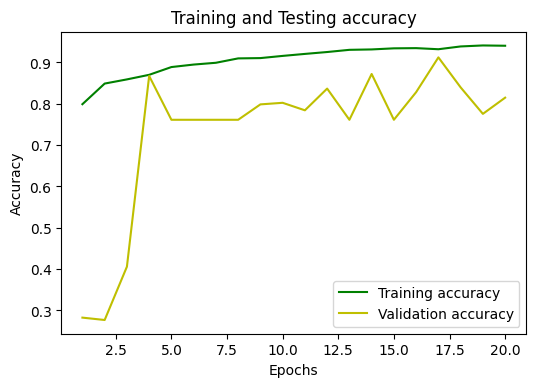

In [57]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1, 21)
plt.figure(figsize=(6,4), dpi=100)
plt.plot(epochs, loss_train, 'g', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'y', label = 'Validation accuracy')
plt.title("Training and Testing accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

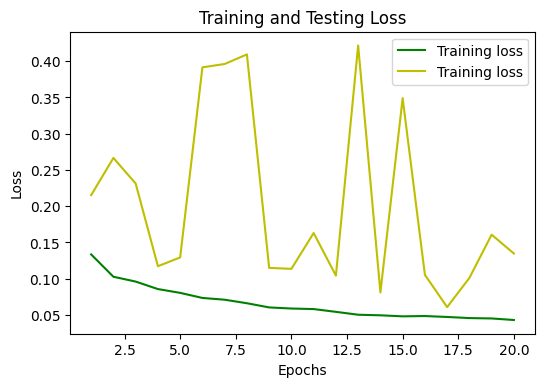

In [58]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.figure(figsize=(6,4), dpi=100)
plt.plot(epochs, loss_train, 'g', label = 'Training loss')
plt.plot(epochs, loss_val, 'y', label = 'Training loss')
plt.title("Training and Testing Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
from tqdm import tqdm_notebook
main='./drive/MyDrive/university/chest_xray 4/test/'
result=[]
class_num=[]
classes = ['PNEUMONIA','NORMAL']
img_size = 250

for c in classes: 
    path = os.path.join(main, c)
    class_num1 = classes.index(c)
    for img in tqdm_notebook(os.listdir(path)):
      try:
          img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
          resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
          exp=exposure.equalize_adapthist(resized_arr/np.max(resized_arr))
          # resized_arr = cv2.filter2D(exp,-1, kernel)
          # X.append(exp)
          # plt.imshow(resized_arr)
          # exp = cv2.Canny(resized_arr, 50, 120)
          yyy=exp.reshape(-1,img_size,img_size,1)
          result.append(np.argmax(model.predict(yyy)))
          class_num.append(class_num1)

        
      except Exception as e:
       
        print(e)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/234 [00:00<?, ?it/s]

In [60]:
# print(result)
# # print('\n')
# print(class_num)

In [61]:
from sklearn.metrics import classification_report
print('Classification report')
print()
print(classification_report(class_num, result, target_names=classes))
## confusion metrix



Classification report

              precision    recall  f1-score   support

   PNEUMONIA       0.87      0.77      0.81       390
      NORMAL       0.67      0.80      0.73       234

    accuracy                           0.78       624
   macro avg       0.77      0.79      0.77       624
weighted avg       0.79      0.78      0.78       624



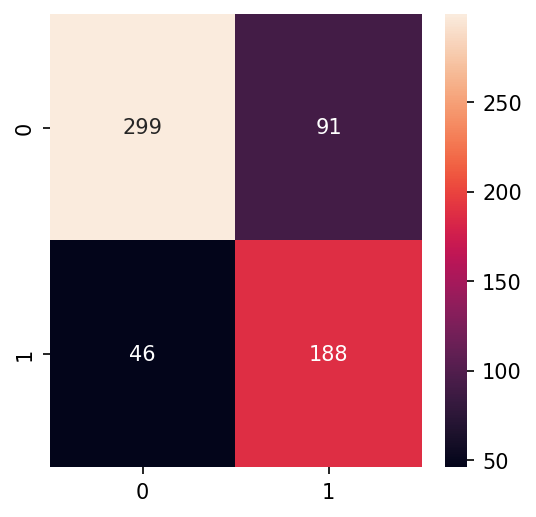

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cmap = confusion_matrix(class_num, result)
plt.figure(figsize = (4, 4), dpi = 150)
hm = sns.heatmap(data=cmap,
                annot=True,
                fmt='g')

In [69]:
TP=299
FP=91
TN=188
FN=46


In [70]:
def accuracy(TP,TN,FP,FN):
  accuracy=(TP+TN)/(TP+TN+FP+FN)
  return accuracy
def sensitivity(TP,FN):
  sensitivity=TP/(TP+FN)
  return sensitivity
def specificity(TN,FP):
  specificity=TN/(TN+FP)
  return specificity


In [71]:
print("accuracy ", accuracy(TP,FP,TN,FN))
print("sensitivity" ,sensitivity(TP,FN))
print("specificity" , specificity(TN,FP))

accuracy  0.625
sensitivity 0.8666666666666667
specificity 0.6738351254480287


In [72]:
# model.save('history1.h5')

In [73]:
# model.save('op1.h5')

In [74]:
# import pickle
# pickle.dump(op1,open('model.pkl','wb'))